# Extracting $C_l$ information using SACC


In [ ]:
# Imports

import sacc as sc
import numpy as np
import matplotlib.pyplot as plt 

In [33]:
# Reading the SACC file
sacc_file = 'fits-files/cls_desi_lrgs_x_cib.fits'
s = sc.Sacc.load_fits(sacc_file)

In [ ]:
# Checking the tracers
for n, t in s.tracers.items():
    print(t.name, t.quantity, type(t))


CIBLenz__353 generic <class 'sacc.tracers.MapTracer'>
CIBLenz__545 generic <class 'sacc.tracers.MapTracer'>
CIBLenz__857 generic <class 'sacc.tracers.MapTracer'>
DESI_LRG__0 galaxy_density <class 'sacc.tracers.NZTracer'>
DESI_LRG__1 galaxy_density <class 'sacc.tracers.NZTracer'>
DESI_LRG__2 galaxy_density <class 'sacc.tracers.NZTracer'>
DESI_LRG__3 galaxy_density <class 'sacc.tracers.NZTracer'>


In [48]:
# Cheking which power spectra are available
print("Tracer combinations:", s.get_tracer_combinations())

print(np.unique([d.data_type for d in s.data]))


Tracer combinations: [(np.str_('CIBLenz__353'), np.str_('DESI_LRG__0')), (np.str_('CIBLenz__353'), np.str_('DESI_LRG__1')), (np.str_('CIBLenz__353'), np.str_('DESI_LRG__2')), (np.str_('CIBLenz__353'), np.str_('DESI_LRG__3')), (np.str_('CIBLenz__545'), np.str_('DESI_LRG__0')), (np.str_('CIBLenz__545'), np.str_('DESI_LRG__1')), (np.str_('CIBLenz__545'), np.str_('DESI_LRG__2')), (np.str_('CIBLenz__545'), np.str_('DESI_LRG__3')), (np.str_('CIBLenz__857'), np.str_('DESI_LRG__0')), (np.str_('CIBLenz__857'), np.str_('DESI_LRG__1')), (np.str_('CIBLenz__857'), np.str_('DESI_LRG__2')), (np.str_('CIBLenz__857'), np.str_('DESI_LRG__3')), (np.str_('DESI_LRG__0'), np.str_('DESI_LRG__0')), (np.str_('DESI_LRG__1'), np.str_('DESI_LRG__1')), (np.str_('DESI_LRG__2'), np.str_('DESI_LRG__2')), (np.str_('DESI_LRG__3'), np.str_('DESI_LRG__3'))]
['cl_00']


<>:16: SyntaxWarning: invalid escape sequence '\e'
<>:17: SyntaxWarning: invalid escape sequence '\e'
<>:18: SyntaxWarning: invalid escape sequence '\e'
<>:16: SyntaxWarning: invalid escape sequence '\e'
<>:17: SyntaxWarning: invalid escape sequence '\e'
<>:18: SyntaxWarning: invalid escape sequence '\e'
/tmp/ipykernel_7096/2333546197.py:16: SyntaxWarning: invalid escape sequence '\e'
  plt.xlabel('Multipole ($\ell$)')
/tmp/ipykernel_7096/2333546197.py:17: SyntaxWarning: invalid escape sequence '\e'
  plt.ylabel('$C_\ell$')
/tmp/ipykernel_7096/2333546197.py:18: SyntaxWarning: invalid escape sequence '\e'
  plt.title('$C_\ell$ for different tracer combinations')


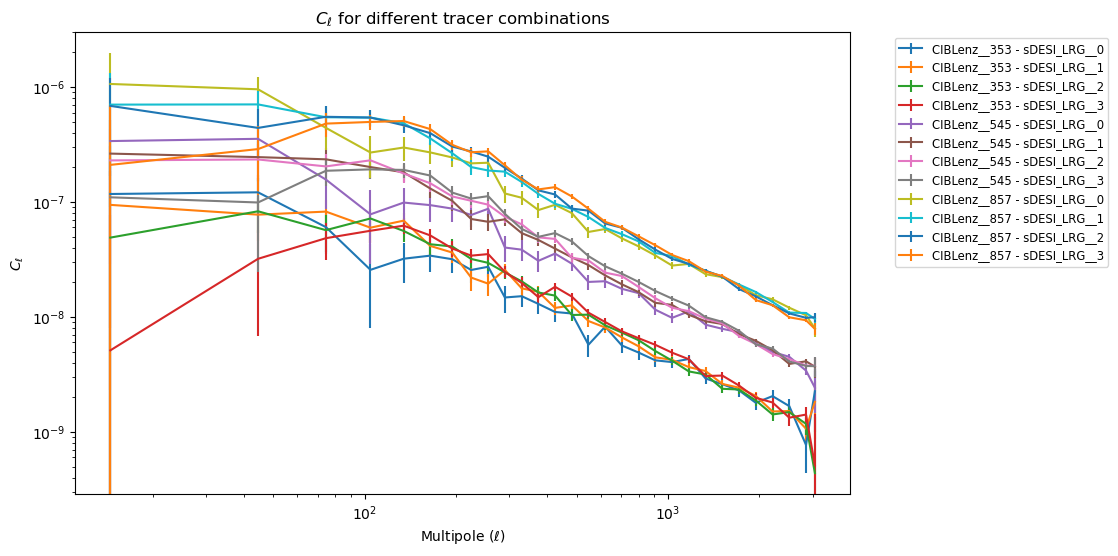

In [46]:
# Plotting data for cross-correlations
cross_correlations = []
for i in s.get_tracer_combinations():
    if i[0] != i[1]:  # Only consider cross-correlations
        cross_correlations.append(i)


plt.figure(figsize=(10, 6))
for t1, t2 in cross_correlations:
    l , cl, cov = s.get_ell_cl(None, t1, t2, return_cov=True)
    err = np.sqrt(np.diag(cov))
    plt.errorbar(l, cl, err, label='%s - s%s' % (t1, t2))

plt.loglog()
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='small')
plt.xlabel('Multipole ($\ell$)')
plt.ylabel('$C_\ell$')
plt.title('$C_\ell$ for different tracer combinations')
plt.show()

<>:15: SyntaxWarning: invalid escape sequence '\e'
<>:16: SyntaxWarning: invalid escape sequence '\e'
<>:17: SyntaxWarning: invalid escape sequence '\e'
<>:15: SyntaxWarning: invalid escape sequence '\e'
<>:16: SyntaxWarning: invalid escape sequence '\e'
<>:17: SyntaxWarning: invalid escape sequence '\e'
/tmp/ipykernel_7096/3517357116.py:15: SyntaxWarning: invalid escape sequence '\e'
  plt.xlabel('Multipole ($\ell$)')
/tmp/ipykernel_7096/3517357116.py:16: SyntaxWarning: invalid escape sequence '\e'
  plt.ylabel('$C_\ell$')
/tmp/ipykernel_7096/3517357116.py:17: SyntaxWarning: invalid escape sequence '\e'
  plt.title('$C_\ell$ for auto-correlations')


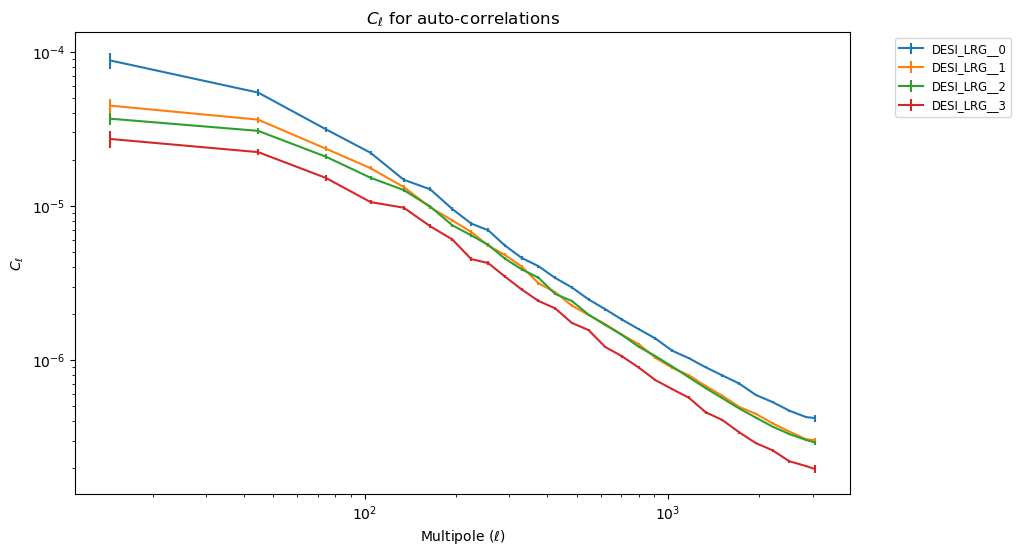

In [47]:
# Plotting data for auto-correlations
auto_correlations = []
for t in s.get_tracer_combinations():
    if t[0] == t[1]:  # Only consider auto-correlations
        auto_correlations.append(t) 

plt.figure(figsize=(10, 6))
for t in auto_correlations:
    l, cl, cov = s.get_ell_cl(None, t[0], t[1], return_cov=True)
    err = np.sqrt(np.diag(cov))
    plt.errorbar(l, cl, err, label='%s' % t[0])

plt.loglog()
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='small')
plt.xlabel('Multipole ($\ell$)')
plt.ylabel('$C_\ell$')
plt.title('$C_\ell$ for auto-correlations')
plt.show()

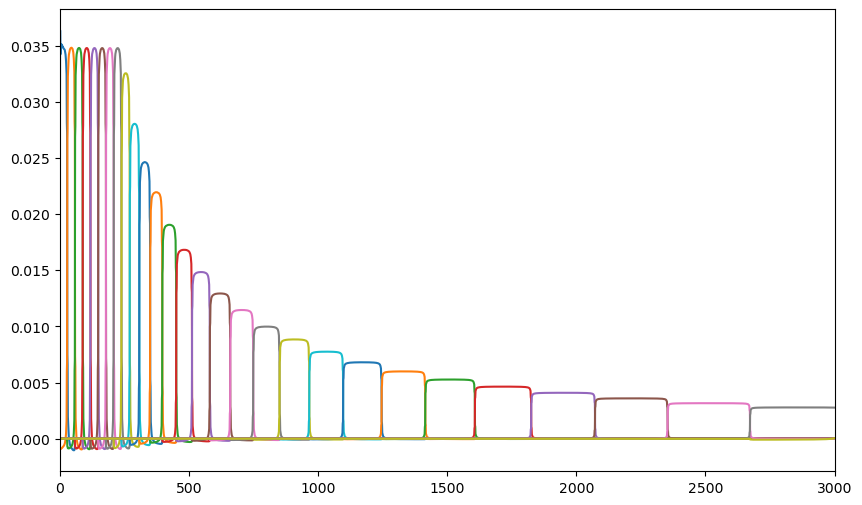

In [53]:
# Inspecting bandpowers

l , cl_lrg0, cov_lrg0, ind_lrg0 = s.get_ell_cl('cl_00', 'DESI_LRG__0', 'DESI_LRG__0', return_cov=True, return_ind=True)
bpw = s.get_bandpower_windows(ind_lrg0)

plt.figure(figsize=(10, 6))
for w in bpw.weight.T:
    plt.plot(bpw.values, w)
    plt.xlim(0, 3000)
